In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.utils import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

import keras
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from tensorflow.keras.applications import VGG19


In [2]:
data_dir = '/Users/marta/Documents/data_dir/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size = 64)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size = 64)

Found 14633 files belonging to 2 classes.
Using 11707 files for training.
Found 14633 files belonging to 2 classes.
Using 2926 files for validation.


In [3]:
# Helped by Argishti Ovsepyan 
classes = np.array(['PLP', 'POR'])
y = [classes[0]] * 5422 + [classes[1]] * 9211
class_weights = compute_class_weight('balanced', classes=classes, y=y)

class_weights_dict = class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 1.349409811877536, 1: 0.794322006296819}

In [4]:
# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


In [9]:
from tensorflow.keras.layers import Dropout

# Add dropout layers
cnn5 = Sequential()

cnn5.add(Conv2D(512, 3, activation='relu', input_shape=(256, 256, 3)))
cnn5.add(MaxPooling2D(2, padding='same'))
cnn5.add(Dropout(0.5))

cnn5.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn5.add(MaxPooling2D(2, padding='same'))
cnn5.add(Dropout(0.5))

cnn5.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn5.add(MaxPooling2D(2, padding='same'))
cnn5.add(Dropout(0.5))

cnn5.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn5.add(MaxPooling2D(2, padding='same'))
cnn5.add(Dropout(0.5))

cnn5.add(Flatten())
cnn5.add(Dense(1, activation='sigmoid'))

cnn5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['acc'])

In [10]:
history5 = cnn5.fit(train_ds, epochs=20, validation_data=val_ds, class_weight=class_weights_dict, callbacks=[reduce_lr])

Epoch 1/20


2024-06-12 09:13:19.835194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]
2024-06-12 09:13:19.835451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]


183/183 [==============================] - ETA: 0s - loss: 24.7043 - acc: 0.5303 

2024-06-12 10:49:21.300827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2926]
	 [[{{node Placeholder/_4}}]]
2024-06-12 10:49:21.301880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2926]
	 [[{{node Placeholder/_4}}]]


183/183 [==============================] - 6134s 34s/step - loss: 24.7043 - acc: 0.5303 - val_loss: 14.7167 - val_acc: 0.6237 - lr: 0.0010
Epoch 2/20
183/183 [==============================] - 6298s 34s/step - loss: 11.6314 - acc: 0.5724 - val_loss: 9.1202 - val_acc: 0.6193 - lr: 0.0010
Epoch 3/20
183/183 [==============================] - 5567s 30s/step - loss: 7.4746 - acc: 0.5815 - val_loss: 6.0685 - val_acc: 0.6203 - lr: 0.0010
Epoch 4/20
183/183 [==============================] - 6589s 36s/step - loss: 5.1101 - acc: 0.5912 - val_loss: 4.2459 - val_acc: 0.6268 - lr: 0.0010
Epoch 5/20
183/183 [==============================] - 5739s 31s/step - loss: 3.6564 - acc: 0.5877 - val_loss: 3.1016 - val_acc: 0.6247 - lr: 0.0010
Epoch 6/20
183/183 [==============================] - 4717s 26s/step - loss: 2.7098 - acc: 0.5978 - val_loss: 2.3312 - val_acc: 0.6230 - lr: 0.0010
Epoch 7/20
183/183 [==============================] - 4768s 26s/step - loss: 2.0752 - acc: 0.6000 - val_loss: 1.8253 - v

In [15]:
cnn5.save('./saved_models/cnn5.h5')
pd.DataFrame(history5.history).to_csv('./saved_models//history5.csv', index=False)

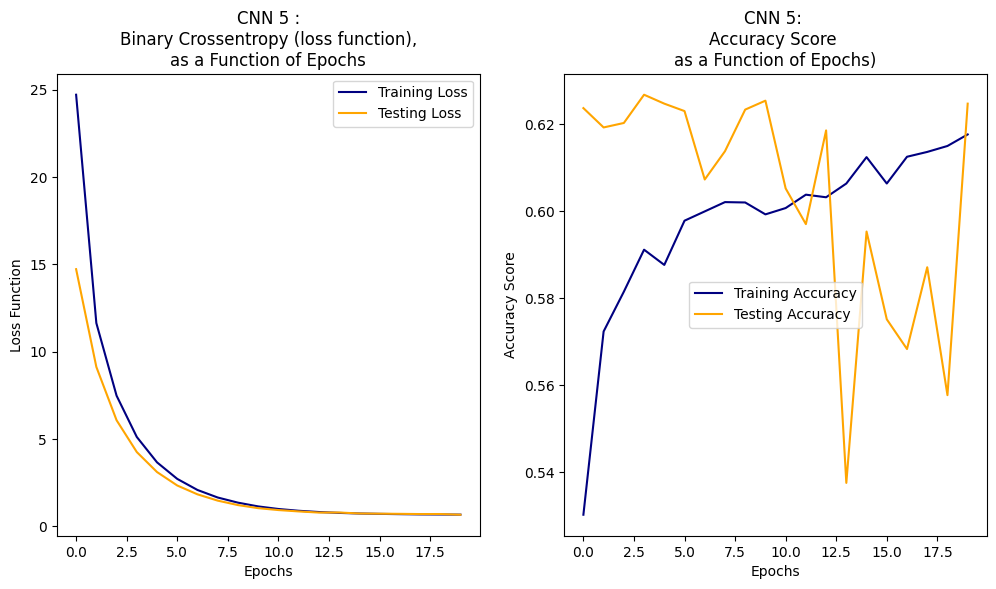

In [16]:
#### Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history5.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history5.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 5 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history5.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history5.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 5: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

## Loading the Model to Analyze Metrics

The CNN has a single output node. The CNN will predict the probabilities for the validation set. The predicted probabilities are thresholded at 0.5 to convert them to class labels (0 or 1). Boolean values are returned. 

In [17]:
# Load the saved model & training history
cnn5 = load_model('./saved_models/cnn5_saved_model/cnn5.h5')
history4 = pd.read_csv('./saved_models/cnn5_saved_model/history5.csv')

# Get the true labels from the validation dataset
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# Predict the probabilities for the validation set
y_pred_probs = cnn5.predict(val_ds, verbose=0)

# Convert probabilities to class labels
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Calculate the F1 score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1 Score: {f1:.4f}")

OSError: No file or directory found at ./saved_models/cnn5_saved_model/cnn5.h5

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = roc_auc_score(y_true, y_pred_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #baseline of AUC = 0.5
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN 5 Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")